## Summary Stats and Winnowed Ensembles

For each map, what is the mean, vs enacted on PRES16 and SEN16?
Look at D-seats.  competitive districts (45-55).  D-seats in winnowed ensemble?

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import pickle
import pandas as pd

In [3]:
cong_results = np.load("data/partisan_runs_all_elects/OR_congress_100000.p")
cong6_results = np.load("data/partisan_runs_all_elects/OR_congress_2020_100000.p")
sen_results = np.load("data/partisan_runs_all_elects/OR_state_senate_100000.p")
# house5_results = np.load("data/partisan_runs_all_elects/OR_state_house_50000_blocks_5%.p")
house_results = np.load("data/partisan_runs_all_elects/OR_state_house_50000_blocks_2%.p")

In [4]:
with open("data/OR_precincts/OR_precinct_graph.p", "rb") as f_in:
    graph = pickle.load(f_in)

In [5]:
elections = [Election("GOV18", {"Dem": "GOV18D", "Rep": "GOV18R"}),
             Election("PRES16",{"Dem": "PRES16D","Rep":"PRES16R"}),
             Election("SEN16",{"Dem": "SEN16D","Rep":"SEN16R"}),
             Election("GOV16", {"Dem": "GOV16D", "Rep": "GOV16R"}),
             Election("AG16", {"Dem": "AG16D", "Rep": "AG16R"}),
             Election("SOS16", {"Dem": "SOS16D", "Rep": "SOS16R"}),
             Election("USH18", {"Dem": "USH18D", "Rep": "USH18R"}),
             Election("USH16", {"Dem": "USH16D", "Rep": "USH16R"})]


or_updaters = {"population" : Tally("TOTPOP", alias="population"), 
               "VAP": Tally("VAP"),
               "HVAP": Tally("HVAP"), 
               "HVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["HVAP"].items()},
               "ASIANVAP": Tally("ASIANVAP"), 
               "ASIANVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["ASIANVAP"].items()},
               "cut_edges": cut_edges}

election_updaters = {election.name: election for election in elections}
or_updaters.update(election_updaters)

In [6]:
enact_cong = Partition(graph, assignment="CD", updaters=or_updaters)
enact_sen = Partition(graph, assignment="SEND", updaters=or_updaters)
enact_house = Partition(graph, assignment="HDIST", updaters=or_updaters)

In [7]:
sorted(enact_house["HVAP_perc"].values())[50:]

[0.12641007224639825,
 0.1305243874513396,
 0.1334117551616436,
 0.14380104417148676,
 0.1487670413265524,
 0.15381673713059552,
 0.20328331934579247,
 0.25145885035884363,
 0.284589865348338,
 0.4314538043478261]

In [8]:
sorted(enact_house["ASIANVAP_perc"].values())[50:]

[0.07339029296369322,
 0.0768875502008032,
 0.09250249633516752,
 0.09753263762727618,
 0.09935944555287199,
 0.1056165934873741,
 0.11010623336722992,
 0.11240662424410103,
 0.12161237481079064,
 0.1643124521746324]

In [9]:
0.1271*60

7.6259999999999994

In [10]:
sen18 = np.load("data/OR_state_senate_100000.p")

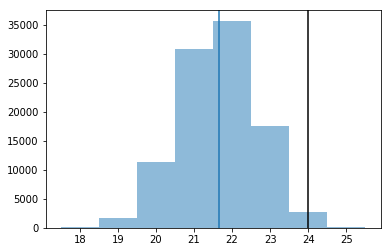

In [20]:
plt.hist(sen18["seats_ush18"], histtype="stepfilled", bins=np.arange(18,27)-0.5, alpha=0.5)
plt.axvline(np.mean(sen18["seats_ush18"]))
plt.axvline(enact_sen["USH18"].seats("Dem"), c="k")

In [12]:
np.mean(sen18["seats_ush18"])

21.64459

In [13]:
enact_sen["USH18"].seats("Dem")

24

## Partisan Runs

### #Democratic Seats

In [22]:
cong = pd.DataFrame()
elections = ["PRES16", "SEN16", "GOV18", "GOV16", "AG16", "SOS16"]

In [26]:
cong["Election"] = elections
cong["D-seats (enacted)"] = list(map(lambda e:  enact_cong[e].seats("Dem"), elections))
cong["D-seats (ens-mean)"] = list(map(lambda e:  np.mean(cong_results["seats_{}".format(e.lower())]), elections))
cong["Comp-seats (enacted)"] = list(map(lambda e:  competitive_seats_enact(e, enact_cong), elections))
cong["Comp-seats (ens-mean)"] = list(map(lambda e:  competitive_seats_mean(e, cong_results), elections))
cong["Mean-Median (ens-mean)"] = list(map(lambda e:  np.mean(cong_results["mean_median_{}".format(e.lower())]), elections))

In [27]:
cong

,Election,D-seats (enacted),D-seats (ens-mean),Comp-seats (enacted),Comp-seats (ens-mean),Mean-Median (ens-mean)
0,PRES16,4,3.10705,2,1.79396,-0.033608
1,SEN16,5,4.79966,1,1.02299,-0.032661
2,GOV18,2,2.53369,2,2.08270,-0.028970
3,GOV16,3,2.59418,2,2.23616,-0.032512
4,AG16,4,3.57772,2,2.02444,-0.028716
5,SOS16,2,1.53099,2,1.41406,-0.022898


In [28]:
cong6 = pd.DataFrame()
cong6["Election"] = elections
# cong6["D-seats (enacted)"] = list(map(lambda e:  enact_cong[e].seats("Dem"), elections))
cong6["D-seats (ens-mean)"] = list(map(lambda e:  np.mean(cong6_results["seats_{}".format(e.lower())]), elections))
# cong6["Comp-seats (enacted)"] = list(map(lambda e:  competitive_seats_enact(e, enact_cong), elections))
cong6["Comp-seats (ens-mean)"] = list(map(lambda e:  competitive_seats_mean(e, cong6_results), elections))
cong6["Mean-Median (ens-mean)"] = list(map(lambda e:  np.mean(cong6_results["mean_median_{}".format(e.lower())]), elections))

In [29]:
cong6

,Election,D-seats (ens-mean),Comp-seats (ens-mean),Mean-Median (ens-mean)
0,PRES16,3.58093,2.01780,-0.023284
1,SEN16,5.79709,1.29503,-0.026070
2,GOV18,2.98158,2.59652,-0.024784
3,GOV16,3.10901,2.64797,-0.027201
4,AG16,4.43742,2.21080,-0.023313
5,SOS16,1.82622,1.69277,-0.021178


In [34]:
sen = pd.DataFrame()

In [35]:
sen["Election"] = elections
sen["D-seats (enacted)"] = list(map(lambda e:  enact_sen[e].seats("Dem"), elections))
sen["D-seats (ens-mean)"] = list(map(lambda e:  np.mean(sen_results["seats_{}".format(e.lower())]), elections))
sen["Comp-seats (enacted)"] = list(map(lambda e:  competitive_seats_enact(e, enact_sen), elections))
sen["Comp-seats (ens-mean)"] = list(map(lambda e:  competitive_seats_mean(e, sen_results), elections))
sen["Mean-Median (ens-mean)"] = list(map(lambda e:  np.mean(sen_results["mean_median_{}".format(e.lower())]), elections))

In [36]:
sen

,Election,D-seats (enacted),D-seats (ens-mean),Comp-seats (enacted),Comp-seats (ens-mean),Mean-Median (ens-mean)
0,PRES16,20,17.15806,9,7.83810,-0.024826
1,SEN16,24,24.95382,4,8.29861,-0.022591
2,GOV18,16,14.84272,10,8.49925,-0.023842
3,GOV16,17,14.65680,8,8.57470,-0.032683
4,AG16,21,19.13664,8,9.24444,-0.022520
5,SOS16,13,10.67127,9,6.90402,-0.027152


In [37]:
house = pd.DataFrame()

In [38]:
house["Election"] = elections
house["D-seats (enacted)"] = list(map(lambda e:  enact_house[e].seats("Dem"), elections))
house["D-seats (ens-mean)"] = list(map(lambda e:  np.mean(house_results["seats_{}".format(e.lower())]), elections))
house["Comp-seats (enacted)"] = list(map(lambda e:  competitive_seats_enact(e, enact_house), elections))
house["Comp-seats (ens-mean)"] = list(map(lambda e:  competitive_seats_mean(e, house_results), elections))
house["Mean-Median (ens-mean)"] = list(map(lambda e:  np.mean(house_results["mean_median_{}".format(e.lower())]), elections))

In [39]:
house

,Election,D-seats (enacted),D-seats (ens-mean),Comp-seats (enacted),Comp-seats (ens-mean),Mean-Median (ens-mean)
0,PRES16,36,34.24046,11,15.66482,-0.024919
1,SEN16,47,47.23108,12,16.55104,-0.017195
2,GOV18,32,29.91718,16,15.50768,-0.020191
3,GOV16,33,30.95918,19,15.61230,-0.023788
4,AG16,39,37.40296,11,16.64450,-0.017625
5,SOS16,23,21.40286,16,13.99802,-0.021447


In [24]:
def competitive_seats(e, results):
    compet = list(map(np.sum, np.logical_and(results["results_{}".format(e.lower())] > 0.45,
                                             results["results_{}".format(e.lower())] < 0.55)))
    return compet

def competitive_seats_enact(e, enact):
    enact_vect = np.array(enact[e].percents("Dem"))
    return sum(np.logical_and(enact_vect > 0.45, enact_vect < 0.55))

def competitive_seats_mean(e, results):
    compet = list(map(np.sum, np.logical_and(results["results_{}".format(e.lower())] > 0.45,
                                             results["results_{}".format(e.lower())] < 0.55)))
    return np.mean(compet)

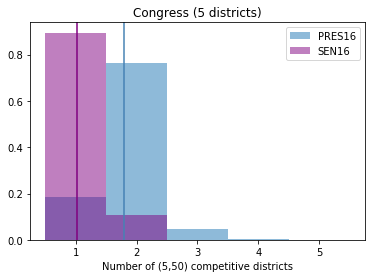

In [71]:
plt.title("Congress (5 districts)")
plt.xlabel("Number of (5,50) competitive districts")
plt.hist(competitive_seats("PRES16", cong_results),
         density=True, alpha=0.5, bins=np.arange(1,7)-0.5, label="PRES16")
plt.hist(competitive_seats("SEN16", cong_results), color="purple",
         density=True, alpha=0.5, bins=np.arange(1,7)-0.5, label="SEN16")
plt.axvline(x=competitive_seats_mean("PRES16", cong_results), color="steelblue")
plt.axvline(x=competitive_seats_mean("SEN16", cong_results), color="purple")
plt.legend()
plt.savefig("plots/partisan_runs/competitiveness/num_compet_dists_congress.png",
           bbox_inches="tight", dpi=200)
plt.show()

In [16]:
max(competitive_seats("SEN16", cong6_results))

3

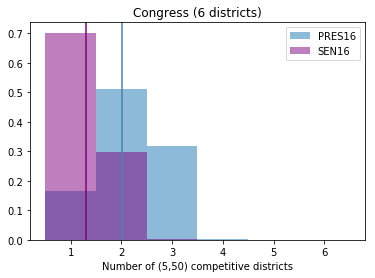

In [72]:
plt.title("Congress (6 districts)")
plt.xlabel("Number of (5,50) competitive districts")
plt.hist(competitive_seats("PRES16", cong6_results),
         density=True, alpha=0.5, bins=np.arange(1,8)-0.5, label="PRES16")
plt.hist(competitive_seats("SEN16", cong6_results), color="purple",
         density=True, alpha=0.5, bins=np.arange(1,8)-0.5, label="SEN16")
plt.axvline(x=competitive_seats_mean("PRES16", cong6_results), color="steelblue")
plt.axvline(x=competitive_seats_mean("SEN16", cong6_results), color="purple")
plt.legend()
plt.savefig("plots/partisan_runs/competitiveness/num_compet_dists_congress_2020.png",
           bbox_inches="tight", dpi=200)
plt.show()

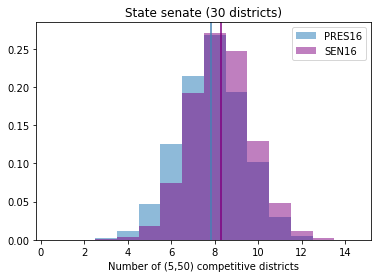

In [73]:
plt.title("State senate (30 districts)")
plt.xlabel("Number of (5,50) competitive districts")
plt.hist(competitive_seats("PRES16", sen_results),
         density=True, alpha=0.5, bins=np.arange(1,16)-0.5, label="PRES16")
plt.hist(competitive_seats("SEN16", sen_results), color="purple",
         density=True, alpha=0.5, bins=np.arange(1,16)-0.5, label="SEN16")
plt.axvline(x=competitive_seats_mean("PRES16", sen_results), color="steelblue")
plt.axvline(x=competitive_seats_mean("SEN16", sen_results), color="purple")
plt.legend()
plt.savefig("plots/partisan_runs/competitiveness/num_compet_dists_state_senate.png",
           bbox_inches="tight", dpi=200)
plt.show()

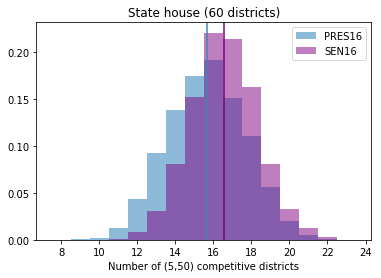

In [25]:
plt.title("State house (60 districts)")
plt.xlabel("Number of (5,50) competitive districts")
plt.hist(competitive_seats("PRES16", house_results),
         density=True, alpha=0.5, bins=np.arange(8,25)-0.5, label="PRES16")
plt.hist(competitive_seats("SEN16", house_results), color="purple",
         density=True, alpha=0.5, bins=np.arange(8,25)-0.5, label="SEN16")
plt.axvline(x=competitive_seats_mean("PRES16", house_results), color="steelblue")
plt.axvline(x=competitive_seats_mean("SEN16", house_results), color="purple")
plt.legend()
plt.savefig("plots/partisan_runs/competitiveness/num_compet_dists_state_house.png",
           bbox_inches="tight", dpi=200)
plt.show()

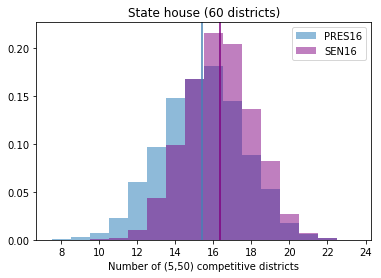

In [26]:
plt.title("State house (60 districts)")
plt.xlabel("Number of (5,50) competitive districts")
plt.hist(competitive_seats("PRES16", house5_results),
         density=True, alpha=0.5, bins=np.arange(8,25)-0.5, label="PRES16")
plt.hist(competitive_seats("SEN16", house5_results), color="purple",
         density=True, alpha=0.5, bins=np.arange(8,25)-0.5, label="SEN16")
plt.axvline(x=competitive_seats_mean("PRES16", house5_results), color="steelblue")
plt.axvline(x=competitive_seats_mean("SEN16", house5_results), color="purple")
plt.legend()

In [53]:
max(competitive_seats("PRES16", sen_results))

14

In [32]:
 np.ma.masked_where(c < 1, c)

masked_array(data=[2, 2, 3, ..., 2, 2, 2],
             mask=[False, False, False, ..., False, False, False],
       fill_value=999999)

In [58]:
results = cong_results
e = "A"
c = np.array(list(map(np.sum, np.logical_and(results["results_{}".format(e.lower())] > 0.45,
                                             results["results_{}".format(e.lower())] < 0.55))))

In [11]:
range(min(c), max(c) + 1)

range(0, 5)

In [13]:
np.unique(c)

array([0, 1, 2, 3, 4])

In [26]:
cmap = plt.get_cmap("tab10")

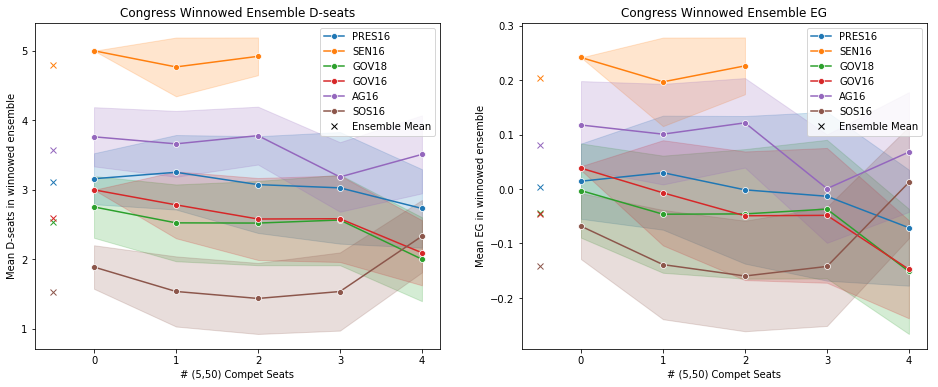

In [163]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                             cong_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong_results["seats_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(cong_results["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("Congress Winnowed Ensemble D-seats")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean D-seats in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                             cong_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong_results["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(cong_results["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("Congress Winnowed Ensemble EG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean EG in winnowed ensemble")


list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/congress_seats_eg.png", 
            bbox_inches="tight", dpi=200)
plt.show()

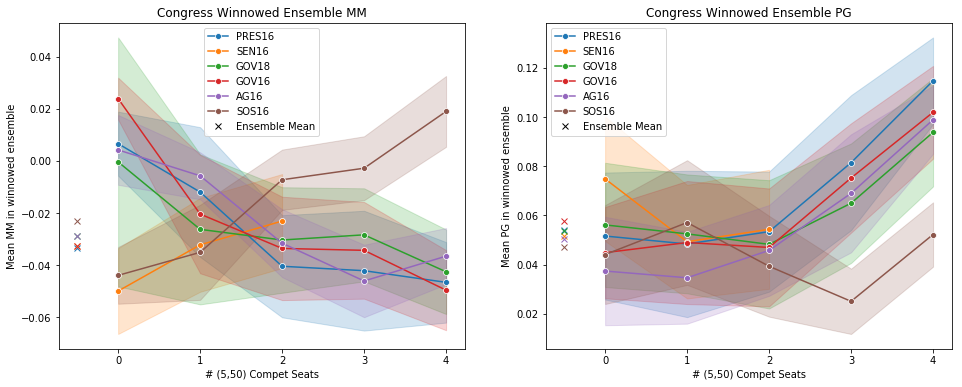

In [164]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                             cong_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong_results["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(cong_results["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("Congress Winnowed Ensemble MM")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean MM in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                             cong_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(cong_results["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("Congress Winnowed Ensemble PG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean PG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/congress_mm_pg.png", 
            bbox_inches="tight", dpi=200)

plt.show()

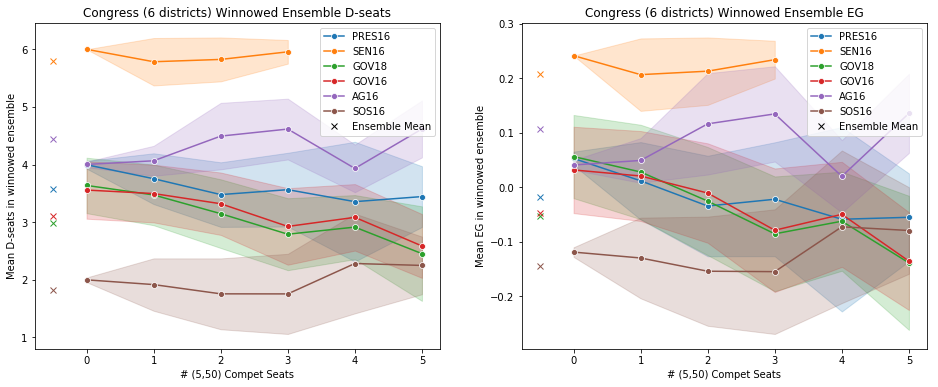

In [12]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong6_results["results_{}".format(e.lower())] > 0.45,
                                             cong6_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong6_results["seats_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(cong6_results["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("Congress (6 districts) Winnowed Ensemble D-seats")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean D-seats in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong6_results["results_{}".format(e.lower())] > 0.45,
                                             cong6_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong6_results["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(cong6_results["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("Congress (6 districts) Winnowed Ensemble EG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean EG in winnowed ensemble")


list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/congress_2020_seats_eg.png", 
            bbox_inches="tight", dpi=200)
plt.show()

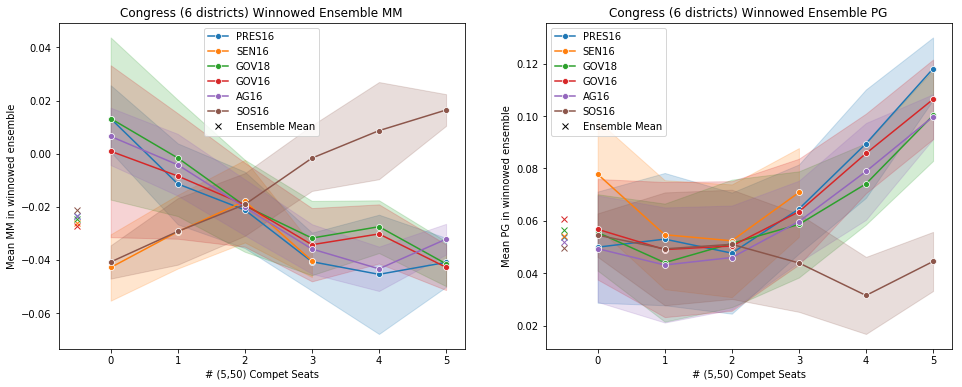

In [11]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong6_results["results_{}".format(e.lower())] > 0.45,
                                             cong6_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong6_results["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(cong6_results["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("Congress (6 districts) Winnowed Ensemble MM")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean MM in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(cong6_results["results_{}".format(e.lower())] > 0.45,
                                             cong6_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=cong6_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(cong6_results["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("Congress (6 districts) Winnowed Ensemble PG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean PG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/congress_2020_mm_pg.png", 
            bbox_inches="tight", dpi=200)

plt.show()

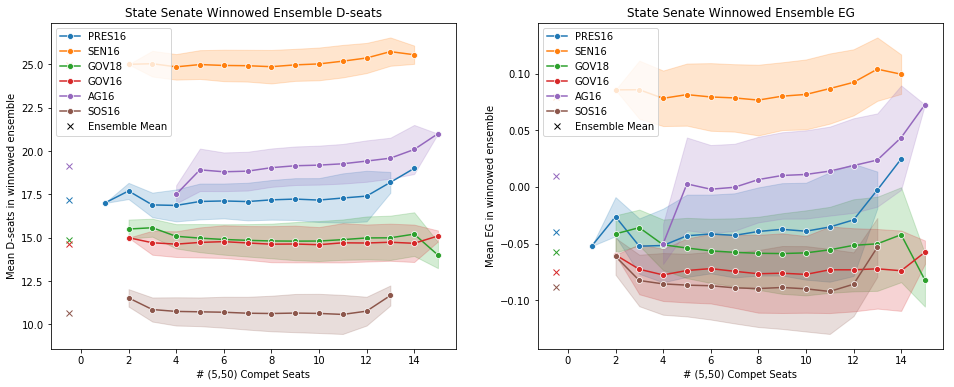

In [165]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(sen_results["results_{}".format(e.lower())] > 0.45,
                                             sen_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=sen_results["seats_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(sen_results["seats_{}".format(e.lower())]), marker="x", c=cmap(i))
    
axs[0].set_title("State Senate Winnowed Ensemble D-seats")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean D-seats in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(sen_results["results_{}".format(e.lower())] > 0.45,
                                             sen_results["results_{}".format(e.lower())] < 0.55))))
    c_seats = np.unique(c)
    d_seats  = list(map(lambda i:  np.mean(sen_results["efficiency_gap_{}".format(e.lower())][~np.ma.masked_where(c < i, c).mask]), 
                    c_seats))
    sns.lineplot(x=c, y=sen_results["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(sen_results["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))
    
axs[1].set_title("State Senate Winnowed Ensemble EG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean EG in winnowed ensemble")


list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/state_senate_seats_eg.png", 
            bbox_inches="tight", dpi=200)
plt.show()

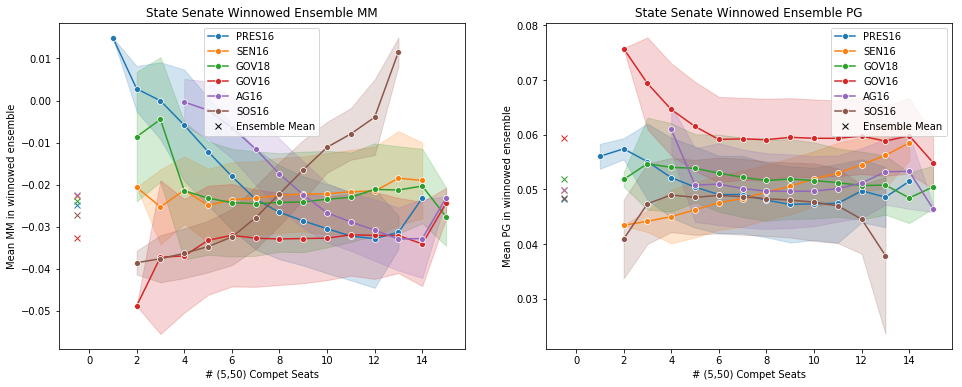

In [166]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(sen_results["results_{}".format(e.lower())] > 0.45,
                                             sen_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=sen_results["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(sen_results["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("State Senate Winnowed Ensemble MM")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean MM in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(sen_results["results_{}".format(e.lower())] > 0.45,
                                             sen_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=sen_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(sen_results["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("State Senate Winnowed Ensemble PG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean PG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/state_senate_mm_pg.png", 
            bbox_inches="tight", dpi=200)

plt.show()

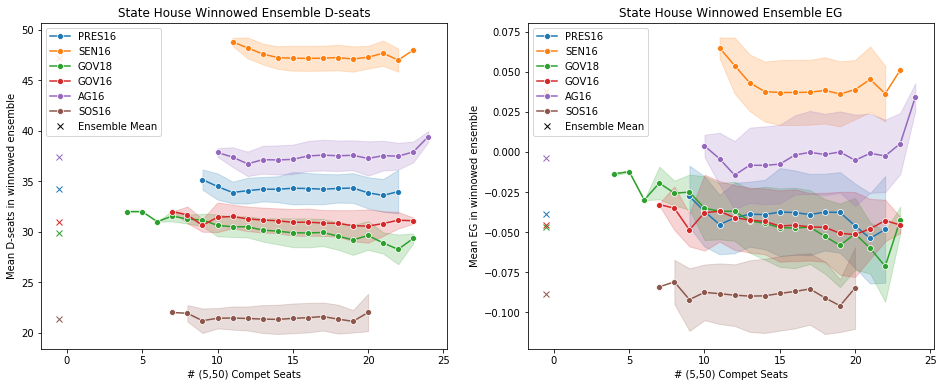

In [27]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house_results["seats_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(house_results["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("State House Winnowed Ensemble D-seats")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean D-seats in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house_results["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(house_results["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("State House Winnowed Ensemble EG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean EG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/state_house_seats_eg.png", 
            bbox_inches="tight", dpi=200)

plt.show()

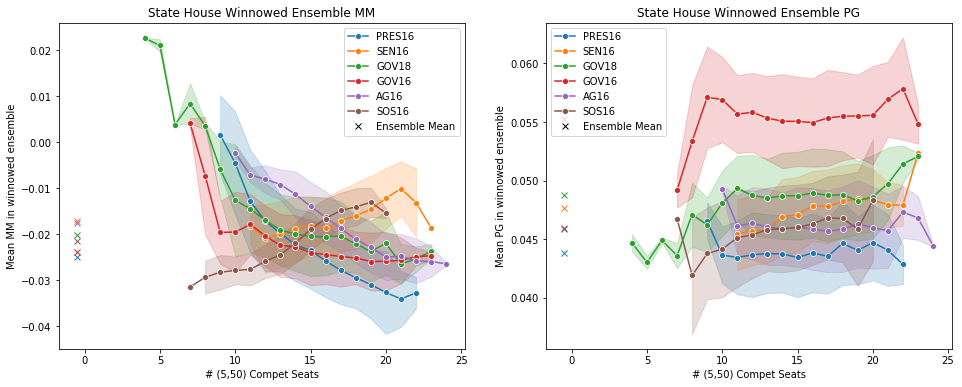

In [28]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house_results["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(house_results["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("State House Winnowed Ensemble MM")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean MM in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(house_results["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("State House Winnowed Ensemble PG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean PG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.savefig("plots/partisan_runs/compet_partisan/state_house_mm_pg.png", 
            bbox_inches="tight", dpi=200)
plt.show()

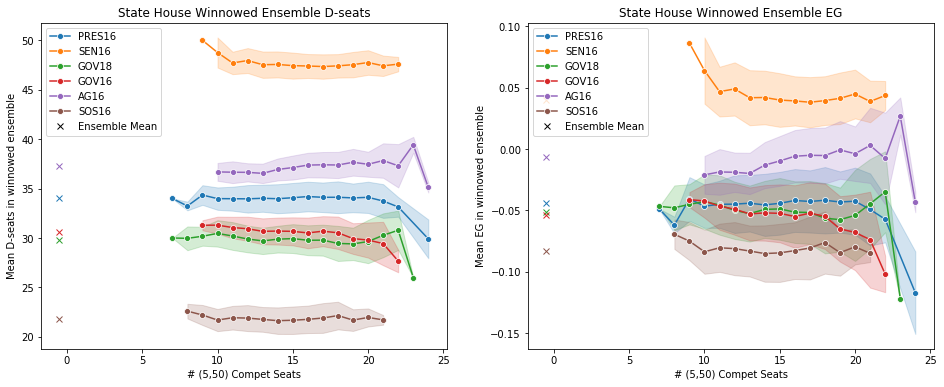

In [17]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house5_results["results_{}".format(e.lower())] > 0.45,
                                             house5_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house5_results["seats_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(house5_results["seats_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("State House Winnowed Ensemble D-seats")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean D-seats in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house5_results["results_{}".format(e.lower())] > 0.45,
                                             house5_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house5_results["efficiency_gap_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(house5_results["efficiency_gap_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("State House Winnowed Ensemble EG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean EG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.show()

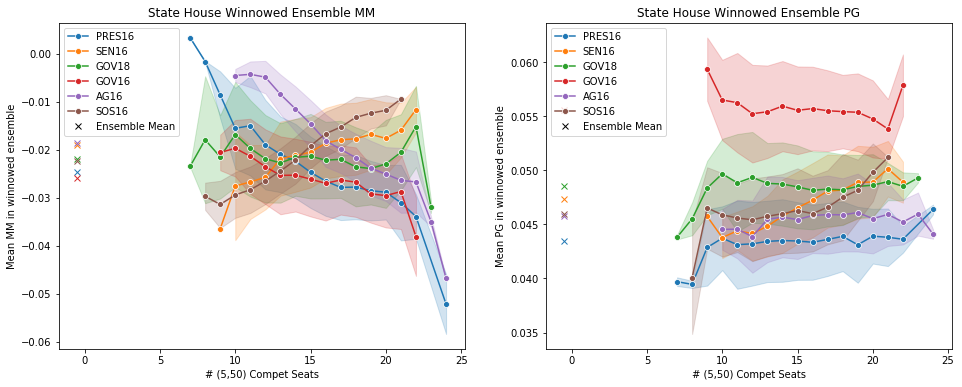

In [18]:
fig, axs = plt.subplots(1,2,figsize=(16,6))

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house5_results["results_{}".format(e.lower())] > 0.45,
                                             house5_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house5_results["mean_median_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[0])
    axs[0].plot(-0.5, np.mean(house5_results["mean_median_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[0].set_title("State House Winnowed Ensemble MM")
axs[0].set_xlabel("# (5,50) Compet Seats")
axs[0].set_ylabel("Mean MM in winnowed ensemble")

for i, e in enumerate(elections):
    c = np.array(list(map(np.sum, np.logical_and(house5_results["results_{}".format(e.lower())] > 0.45,
                                             house5_results["results_{}".format(e.lower())] < 0.55))))
    sns.lineplot(x=c, y=house5_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, ci="sd", ax=axs[1])
    axs[1].plot(-0.5, np.mean(house5_results["partisan_gini_{}".format(e.lower())]), marker="x", c=cmap(i))

axs[1].set_title("State House Winnowed Ensemble PG")
axs[1].set_xlabel("# (5,50) Compet Seats")
axs[1].set_ylabel("Mean PG in winnowed ensemble")

list(map(lambda ax: (ax.plot([],linestyle="None", marker="x", color="k", label="Ensemble Mean"),
                     ax.legend()), axs))
plt.show()

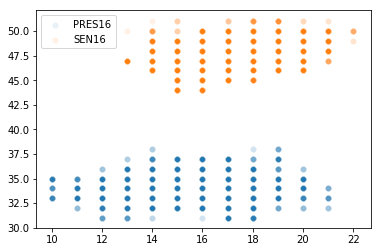

In [21]:
for e in ["PRES16", "SEN16"]:
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.scatterplot(x=c, y=house_results["seats_{}".format(e.lower())], marker='o', label=e, alpha=0.1)

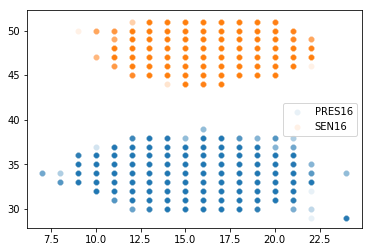

In [22]:
for e in ["PRES16", "SEN16"]:
    c = np.array(list(map(np.sum, np.logical_and(house5_results["results_{}".format(e.lower())] > 0.45,
                                             house5_results["results_{}".format(e.lower())] < 0.55))))
    sns.scatterplot(x=c, y=house5_results["seats_{}".format(e.lower())], marker='o', label=e, alpha=0.1)

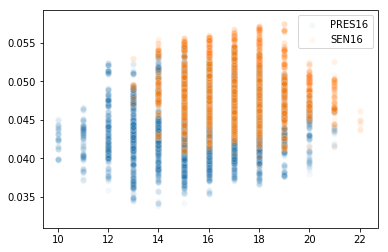

In [23]:
for e in ["PRES16", "SEN16"]:
    c = np.array(list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55))))
    sns.scatterplot(x=c, y=house_results["partisan_gini_{}".format(e.lower())], marker='o', label=e, alpha=0.05)

## Congressional Winnowed Plots

In [22]:
def winnowed_ensemble_most_compet(e, results):
    compet = list(map(np.sum, np.logical_and(results["results_{}".format(e.lower())] > 0.45,
                                             results["results_{}".format(e.lower())] < 0.55)))
    mask = np.ma.masked_where(compet < max(compet), compet)
    d = {"max_comp": max(compet)}
    d["results"] = results["results_{}".format(e.lower())][~mask.mask]
    d["seats"] = results["seats_{}".format(e.lower())][~mask.mask]
    d["eg"] = results["efficiency_gap_{}".format(e.lower())][~mask.mask]
    d["mm"] = results["mean_median_{}".format(e.lower())][~mask.mask]
    d["pg"] = results["partisan_gini_{}".format(e.lower())][~mask.mask]
    return (d)

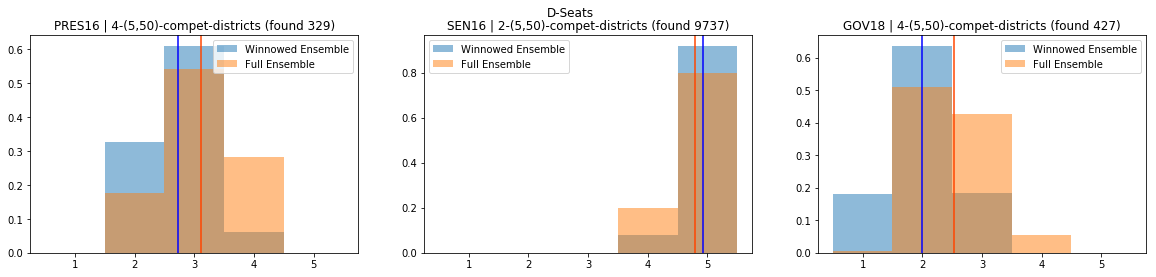

In [23]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("D-Seats")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    full = cong_results["seats_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["seats"])))
    axs[i].hist(winnowed["seats"], label="Winnowed Ensemble", density=True,
                alpha=0.5, bins=np.arange(1,7)-0.5)
    axs[i].hist(full, label="Full Ensemble",
                density=True, alpha=0.5, bins=np.arange(1,7)-0.5)
    axs[i].axvline(np.mean(winnowed["seats"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()
plt.savefig("plots/partisan_runs/competitiveness/democratic_seats.png", bbox_inches="tight", dpi=200)

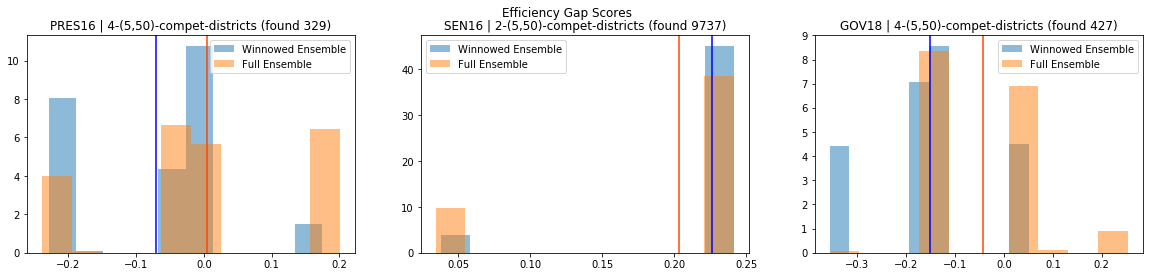

In [309]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    full = cong_results["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["eg"])))
    axs[i].hist(winnowed["eg"], label="Winnowed Ensemble", density=True, alpha=0.5)
    axs[i].hist(full, label="Full Ensemble", density=True, alpha=0.5)
    axs[i].axvline(np.mean(winnowed["eg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()
plt.savefig("plots/partisan_runs/competitiveness/eg.png", bbox_inches="tight", dpi=200)

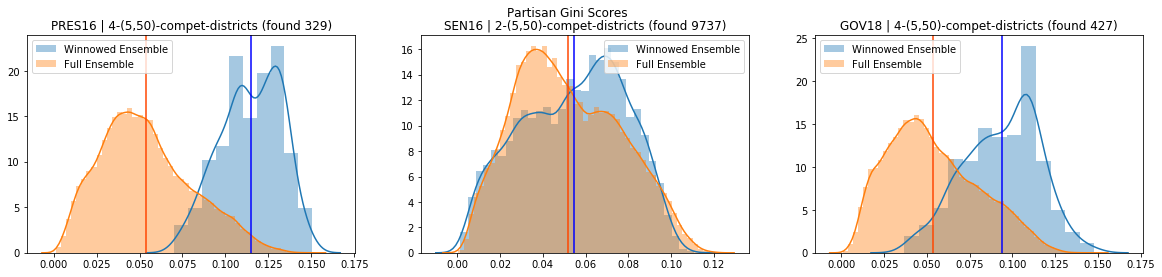

In [310]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    full = cong_results["partisan_gini_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["pg"])))
    sns.distplot(winnowed["pg"], ax=axs[i], label="Winnowed Ensemble")
    sns.distplot(full, ax=axs[i], label="Full Ensemble")
    axs[i].axvline(np.mean(winnowed["pg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()
plt.savefig("plots/partisan_runs/competitiveness/pg.png", bbox_inches="tight", dpi=200)

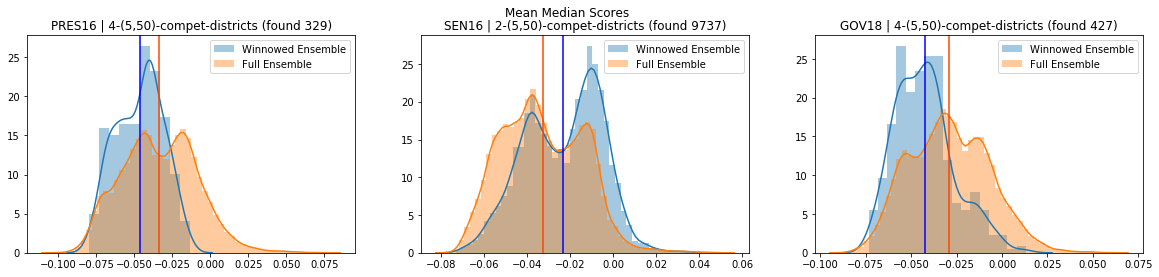

In [311]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    full = cong_results["mean_median_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["mm"])))
    sns.distplot(winnowed["mm"], ax=axs[i], label="Winnowed Ensemble")
    sns.distplot(full, ax=axs[i], label="Full Ensemble")
    axs[i].axvline(np.mean(winnowed["mm"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()
plt.savefig("plots/partisan_runs/competitiveness/mm.png", bbox_inches="tight", dpi=200)

In [325]:
for e in ["PRES16", "SEN16"]:
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    print("Winnowed Ensemble Mean {}".format(e))
    print("Seats: \t", np.mean(winnowed["seats"]))
    print("EG: \t", np.mean(winnowed["eg"]))
    print("MM: \t", np.mean(winnowed["mm"]))
    print("PG: \t", np.mean(winnowed["pg"]))
    print()

Winnowed Ensemble Mean PRES16
Seats: 	 2.7325227963525838
EG: 	 -0.07101560843975334
MM: 	 -0.046605826080779934
PG: 	 0.11475258573413791

Winnowed Ensemble Mean SEN16
Seats: 	 4.919995891958509
EG: 	 0.22611111366872425
MM: 	 -0.023102434139466863
PG: 	 0.05436615038220583



In [326]:
for e in ["PRES16", "SEN16"]:
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    print("Winnowed Ensemble Mean {}".format(e))
    print("Seats: \t", np.mean(winnowed["seats"]))
    print("EG: \t", np.mean(winnowed["eg"]))
    print("MM: \t", np.mean(winnowed["mm"]))
    print("PG: \t", np.mean(winnowed["pg"]))
    print()

Winnowed Ensemble Mean PRES16
Seats: 	 19.0
EG: 	 0.024692226265039852
MM: 	 -0.023207476387631543
PG: 	 0.051461120525814745

Winnowed Ensemble Mean SEN16
Seats: 	 25.555555555555557
EG: 	 0.09950038039291981
MM: 	 -0.018999024258381476
PG: 	 0.058516781915188304



## State Senate Winnowed Plots

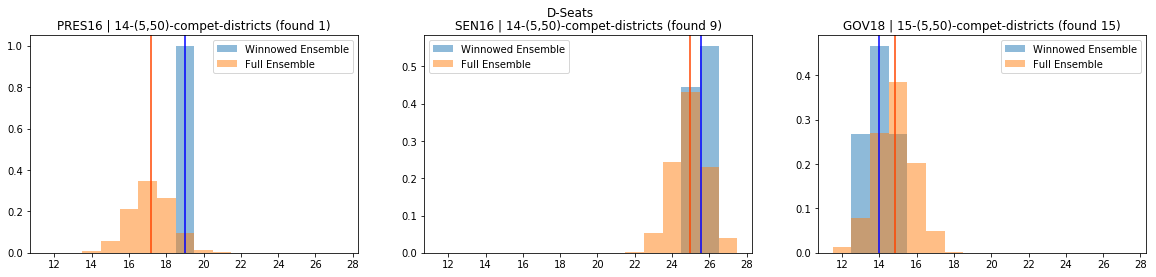

In [312]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("D-Seats")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    full = sen_results["seats_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["seats"])))
    axs[i].hist(winnowed["seats"], label="Winnowed Ensemble", density=True,
                alpha=0.5, bins=np.arange(12,29)-0.5)
    axs[i].hist(full, label="Full Ensemble",
                density=True, alpha=0.5, bins=np.arange(12,29)-0.5)
    axs[i].axvline(np.mean(winnowed["seats"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

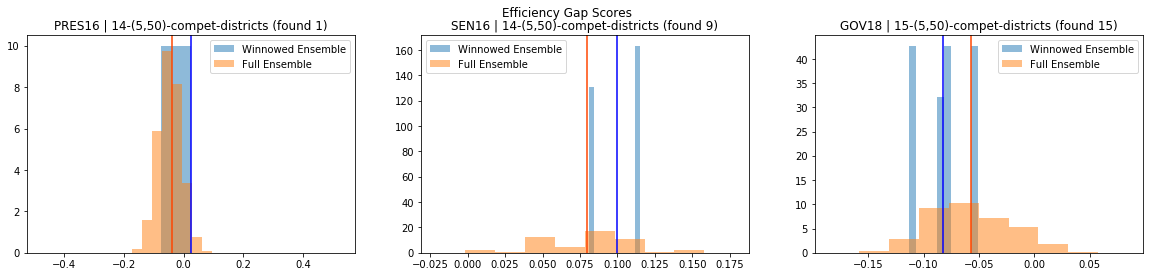

In [313]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    full = sen_results["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["eg"])))
    axs[i].hist(winnowed["eg"], label="Winnowed Ensemble", density=True, alpha=0.5)
    axs[i].hist(full, label="Full Ensemble", density=True, alpha=0.5)
    axs[i].axvline(np.mean(winnowed["eg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

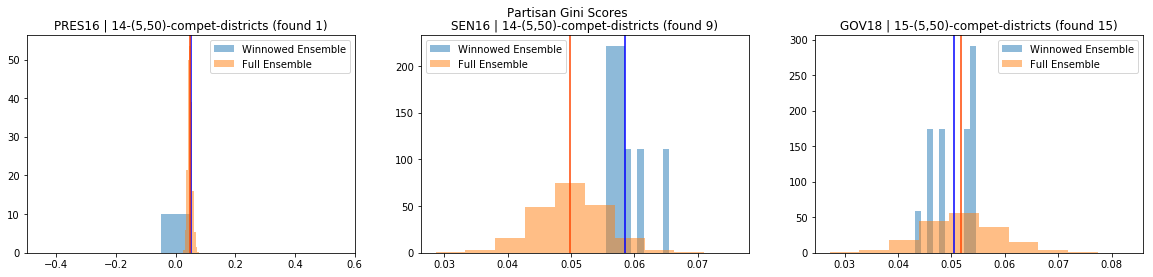

In [314]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    full = sen_results["partisan_gini_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["pg"])))
    axs[i].hist(winnowed["pg"], density=True,label="Winnowed Ensemble",  alpha=0.5)
    axs[i].hist(full,density=True, label="Full Ensemble",  alpha=0.5)
    axs[i].axvline(np.mean(winnowed["pg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

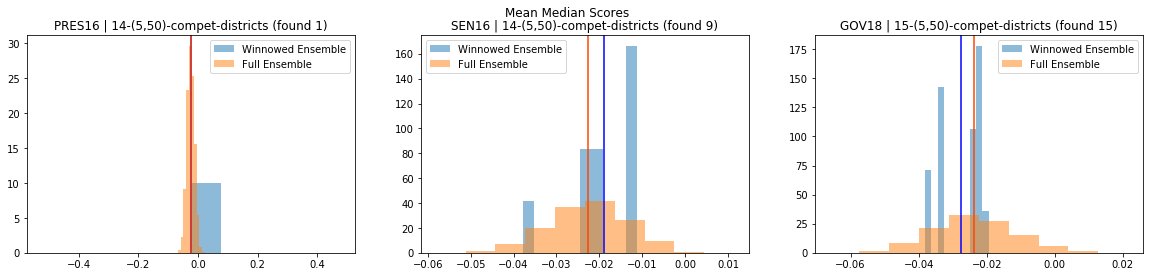

In [315]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    full = sen_results["mean_median_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["mm"])))
    axs[i].hist(winnowed["mm"], density=True,label="Winnowed Ensemble",  alpha=0.5)
    axs[i].hist(full,density=True, label="Full Ensemble",  alpha=0.5)
    axs[i].axvline(np.mean(winnowed["mm"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

In [98]:
print("Congressional Winnowed Ensemble Means:\n")
print("Election | D-seats\t| Mean Median\t| Efficiency Gap\t| Partisan Gini")
print('-'*80)
for e in elections:
    if e =="GOV18": print('-'*80)
    winnowed = winnowed_ensemble_most_compet(e, cong_results)
    print("{}\t |".format(e), "{0:.3f}".format(np.mean(winnowed["seats"])), 
          "\t|", "{0:.3f}".format(np.mean(winnowed["mm"])),
          "\t|", "{0:.3f}".format(np.mean(winnowed["eg"])),
          "\t\t|", "{0:.3f}".format(np.mean(winnowed["pg"])),)

Congressional Winnowed Ensemble Means:

Election | D-seats	| Mean Median	| Efficiency Gap	| Partisan Gini
--------------------------------------------------------------------------------
PRES16	 | 2.733 	| -0.047 	| -0.071 		| 0.115
SEN16	 | 4.920 	| -0.023 	| 0.226 		| 0.054
--------------------------------------------------------------------------------
GOV18	 | 2.002 	| -0.043 	| -0.151 		| 0.094
GOV16	 | 2.095 	| -0.050 	| -0.147 		| 0.102
AG16	 | 3.510 	| -0.037 	| 0.068 		| 0.099
SOS16	 | 2.333 	| 0.019 	| 0.012 		| 0.052


In [96]:
print("State Senate Winnowed Ensemble Means:\n")
print("Election | D-seats\t| Mean Median\t| Efficiency Gap\t| Partisan Gini")
print('-'*80)

for e in elections:
    if e =="GOV18": print('-'*80)
    winnowed = winnowed_ensemble_most_compet(e, sen_results)
    print("{}\t |".format(e), "{0:.3f}".format(np.mean(winnowed["seats"])), 
          "\t|", "{0:.3f}".format(np.mean(winnowed["mm"])),
          "\t|", "{0:.3f}".format(np.mean(winnowed["eg"])),
          "\t\t|", "{0:.3f}".format(np.mean(winnowed["pg"])),)

State Senate Winnowed Ensemble Means:

Election | D-seats	| Mean Median	| Efficiency Gap	| Partisan Gini
--------------------------------------------------------------------------------
PRES16	 | 19.000 	| -0.023 	| 0.025 		| 0.051
SEN16	 | 25.556 	| -0.019 	| 0.100 		| 0.059
--------------------------------------------------------------------------------
GOV18	 | 14.000 	| -0.028 	| -0.082 		| 0.050
GOV16	 | 15.100 	| -0.024 	| -0.058 		| 0.055
AG16	 | 21.000 	| -0.023 	| 0.073 		| 0.046
SOS16	 | 11.667 	| 0.012 	| -0.053 		| 0.038


In [97]:
print("State House Winnowed Ensemble Means:\n")
print("Election | D-seats\t| Mean Median\t| Efficiency Gap\t| Partisan Gini")
print('-'*80)

for e in elections:
    if e =="GOV18": print('-'*80)
    winnowed = winnowed_ensemble_most_compet(e, house_results)
    print("{}\t |".format(e), "{0:.3f}".format(np.mean(winnowed["seats"])), 
          "\t|", "{0:.3f}".format(np.mean(winnowed["mm"])),
          "\t|", "{0:.3f}".format(np.mean(winnowed["eg"])),
          "\t\t|", "{0:.3f}".format(np.mean(winnowed["pg"])),)

State House Winnowed Ensemble Means:

Election | D-seats	| Mean Median	| Efficiency Gap	| Partisan Gini
--------------------------------------------------------------------------------
PRES16	 | 33.115 	| -0.041 	| -0.058 		| 0.044
SEN16	 | 49.818 	| -0.001 	| 0.078 		| 0.045
--------------------------------------------------------------------------------
GOV18	 | 29.344 	| -0.024 	| -0.043 		| 0.052
GOV16	 | 30.927 	| -0.026 	| -0.042 		| 0.062
AG16	 | 34.143 	| -0.022 	| -0.058 		| 0.046
SOS16	 | 22.000 	| -0.007 	| -0.079 		| 0.052


## Winnowed Ensemble House

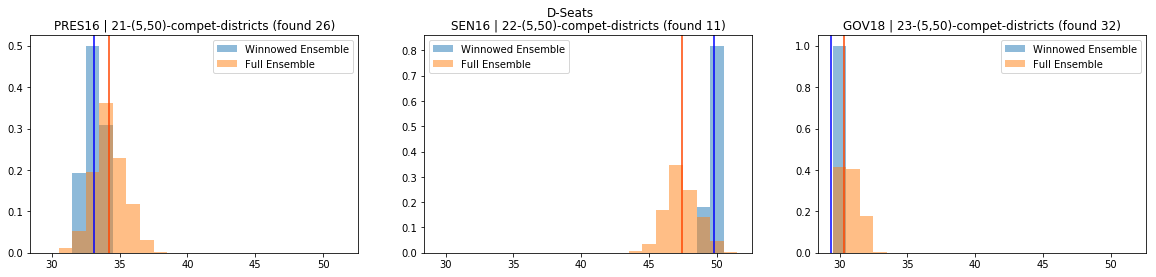

In [40]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("D-Seats")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, house_results)
    full = house_results["seats_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["seats"])))
    axs[i].hist(winnowed["seats"], label="Winnowed Ensemble", density=True,
                alpha=0.5, bins=np.arange(30,53)-0.5)
    axs[i].hist(full, label="Full Ensemble",
                density=True, alpha=0.5, bins=np.arange(30,53)-0.5)
    axs[i].axvline(np.mean(winnowed["seats"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

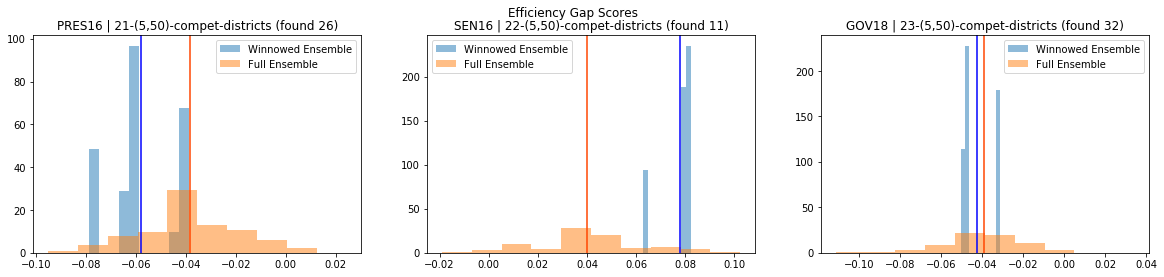

In [43]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Efficiency Gap Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, house_results)
    full = house_results["efficiency_gap_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["eg"])))
    axs[i].hist(winnowed["eg"], label="Winnowed Ensemble", density=True, alpha=0.5)
    axs[i].hist(full, label="Full Ensemble", density=True, alpha=0.5)
    axs[i].axvline(np.mean(winnowed["eg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

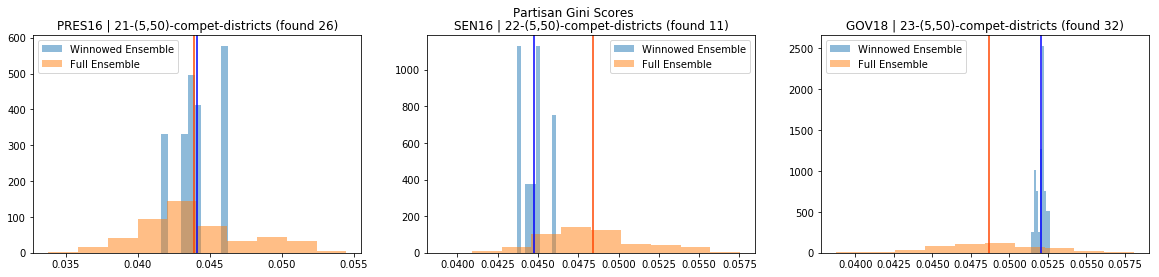

In [44]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Partisan Gini Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, house_results)
    full = house_results["partisan_gini_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["pg"])))
    axs[i].hist(winnowed["pg"], density=True,label="Winnowed Ensemble",  alpha=0.5)
    axs[i].hist(full,density=True, label="Full Ensemble",  alpha=0.5)
    axs[i].axvline(np.mean(winnowed["pg"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

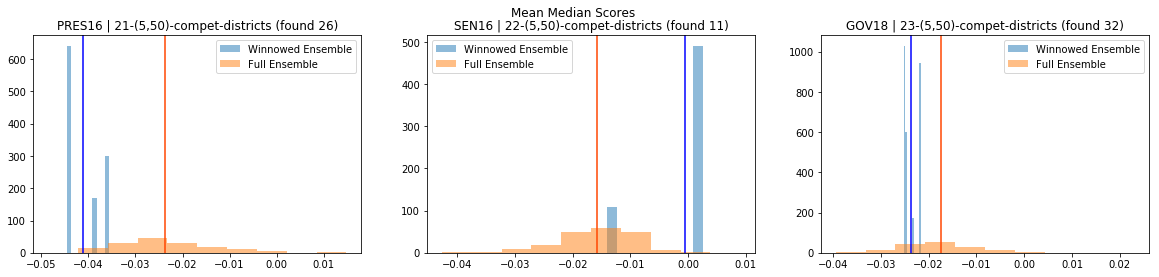

In [45]:
fig, axs = plt.subplots(1,3, figsize=(20,4))
fig.suptitle("Mean Median Scores")
for i, e in enumerate(["PRES16", "SEN16", "GOV18"]):
    winnowed = winnowed_ensemble_most_compet(e, house_results)
    full = house_results["mean_median_{}".format(e.lower())]
    axs[i].set_title("{} | {}-(5,50)-compet-districts (found {})".format(e,
                                                                         winnowed["max_comp"],
                                                                         len(winnowed["mm"])))
    axs[i].hist(winnowed["mm"], density=True,label="Winnowed Ensemble",  alpha=0.5)
    axs[i].hist(full,density=True, label="Full Ensemble",  alpha=0.5)
    axs[i].axvline(np.mean(winnowed["mm"]), color="b")
    axs[i].axvline(np.mean(full), color="orangered")
    axs[i].legend()

In [113]:
house = pd.DataFrame()

In [114]:
house["Election"] = elections
house["D-seats (enacted)"] = list(map(lambda e:  enact_house[e].seats("Dem"), elections))
house["D-seats (ens-mean)"] = list(map(lambda e:  np.mean(house_results["seats_{}".format(e.lower())]), elections))

In [115]:
house

,Election,D-seats (enacted),D-seats (ens-mean)
0,PRES16,36,34.14683
1,SEN16,47,47.22910
2,GOV16,33,30.59374
3,GOV18,32,29.81240
4,AG16,39,37.77954
5,SOS16,23,21.43803


In [11]:
for e in ["PRES16", "SEN16"]:
    print("Enacted Plan ({}):".format(e), enact_cong[e].seats("Dem"))
    print("Ensemble Mean ({})".format(e), np.mean(cong_results["seats_{}".format(e.lower())]))

Enacted Plan (PRES16): 4
Ensemble Mean (PRES16) 3.10705
Enacted Plan (SEN16): 5
Ensemble Mean (SEN16) 4.79966


In [29]:
for e in ["PRES16", "SEN16"]:
    print("Enacted Plan ({}):".format(e), enact_sen[e].seats("Dem"))
    print("Ensemble Mean ({})".format(e),  np.mean(sen_results["seats_{}".format(e.lower())]))

Enacted Plan (PRES16): 20
Ensemble Mean (PRES16) 17.3653
Enacted Plan (SEN16): 24
Ensemble Mean (SEN16) 25.1954


In [12]:
for e in ["PRES16", "SEN16"]:
    print("Enacted Plan ({}):".format(e), enact_house[e].seats("Dem"))
    print("Ensemble Mean ({})".format(e),  np.mean(house_results["seats_{}".format(e.lower())]))

Enacted Plan (PRES16): 36
Ensemble Mean (PRES16) 34.14683
Enacted Plan (SEN16): 47
Ensemble Mean (SEN16) 47.2291


### #Competitive Seats

In [16]:
for e in ["PRES16", "SEN16"]:
    enact_vect = np.array(enact_cong[e].percents("Dem"))
    compet = list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                             cong_results["results_{}".format(e.lower())] < 0.55)))
    print("Enacted Plan ({}):".format(e), sum(np.logical_and(enact_vect > 0.45, enact_vect < 0.55)))
    print("Ensemble Mean ({})".format(e), np.mean(compet))

Enacted Plan (PRES16): 2
Ensemble Mean (PRES16) 1.79396
Enacted Plan (SEN16): 1
Ensemble Mean (SEN16) 1.02299


In [17]:
for e in ["PRES16", "SEN16"]:
    enact_vect = np.array(enact_sen[e].percents("Dem"))
    compet = list(map(np.sum, np.logical_and(sen_results["results_{}".format(e.lower())] > 0.45,
                                             sen_results["results_{}".format(e.lower())] < 0.55)))
    print("Enacted Plan ({}):".format(e), sum(np.logical_and(enact_vect > 0.45, enact_vect < 0.55)))
    print("Ensemble Mean ({})".format(e), np.mean(compet))

Enacted Plan (PRES16): 9
Ensemble Mean (PRES16) 7.8381
Enacted Plan (SEN16): 4
Ensemble Mean (SEN16) 8.29861


In [18]:
for e in ["PRES16", "SEN16"]:
    enact_vect = np.array(enact_house[e].percents("Dem"))
    compet = list(map(np.sum, np.logical_and(house_results["results_{}".format(e.lower())] > 0.45,
                                             house_results["results_{}".format(e.lower())] < 0.55)))
    print("Enacted Plan ({}):".format(e), sum(np.logical_and(enact_vect > 0.45, enact_vect < 0.55)))
    print("Ensemble Mean ({})".format(e), np.mean(compet))

Enacted Plan (PRES16): 11
Ensemble Mean (PRES16) 15.11978
Enacted Plan (SEN16): 12
Ensemble Mean (SEN16) 15.94877


### #Democratic Seats in winnowed ensemble for maximum competitive districts

In [51]:
import numpy.ma as ma

In [61]:
e = "PRES16"

In [62]:
compet = np.array((list(map(np.sum, np.logical_and(cong_results["results_{}".format(e.lower())] > 0.45,
                                                   cong_results["results_{}".format(e.lower())] < 0.55)))))

In [65]:
max(compet)

4

In [66]:
m = np.ma.masked_where(compet < 4, compet)

In [67]:
m.mask

array([ True,  True,  True, ...,  True,  True,  True])

In [68]:
s = cong_results["seats_{}".format(e.lower())]

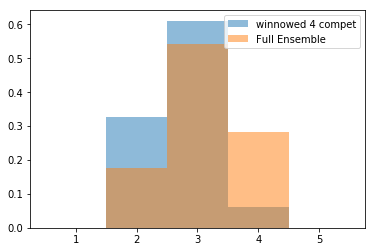

In [91]:
plt.hist(s[~m.mask], density=True, alpha=0.5, bins=np.arange(1,7)-0.5, label="winnowed 4 compet")
plt.hist(s, density=True, alpha=0.5, bins=np.arange(1,7)-0.5, label="Full Ensemble")
plt.legend()
plt.show()

In [70]:
sum(np.logical_and(enact_vect > 0.45, enact_vect < 0.55))

1

In [45]:
a = np.where(cong_results["PRES16"] > 0.45, 1, 0)

In [46]:
b = np.where(cong_results["PRES16"] < 0.55, 1, 0)

In [64]:
np.array(enact_cong[e].percents("Dem")) > 0.45

array([ True,  True,  True,  True,  True])

In [55]:
y = list(map(np.sum, np.logical_and(cong_results["PRES16"] > 0.45, cong_results["PRES16"] < 0.55)))

In [51]:
x = list(map(np.sum, np.logical_and(a,b)))

In [31]:
cong_results["PRES16"] > 0.45 and cong_results["PRES16"] < 0.55

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()